### Instalasi Khusus Google Colab

In [ ]:
%%capture

# for google colab

# !pip install datasets tensorboard sentencepiece accelerate evaluate rouge_score --quiet bitsandbytes
# !pip install transformers==4.47.1 --quiet
# !pip install unsloth==2024.11.7 --quiet

!pip install unsloth
!pip install datasets tensorboard sentencepiece accelerate evaluate rouge_score --quiet bitsandbytes
!pip uninstall unsloth -y && pip install --upgrade --no-cache-dir --no-deps git+https://github.com/unslothai/unsloth.git
# !pip install --upgrade --no-cache-dir transformers
!pip install transformers==4.48.0 --quiet

### Instalasi Khusus Paperspace Gradient

In [ ]:
# %%capture
# %%bash

# # create new-kernel to paperspace gradient

# apt-get update
# apt install bash
# apt-get install jq
# apt-get install libaio-dev -y
# apt-get install libcurl4-openssl-dev -y

# python3 -m venv .env_unsloth
# source .env_unsloth/bin/activate
# pip install --upgrade pip setuptools wheel
# pip install ipykernel
# pip install --upgrade ipywidgets

# python -m ipykernel install --user --name=.env_unsloth --display-name="Python (UNSLOTH_GPU)"

In [ ]:
# %%capture

# # for paperspace gradient

# %pip install "unsloth[cu118-torch251] @ git+https://github.com/unslothai/unsloth.git" --no-deps
# %pip install unsloth==2025.1.5 --force-reinstall
# %pip uninstall torch torchvision torchaudio -y
# %pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

# %pip install rouge_score
# %pip install evaluate
# %pip install pandas
# %pip install tqdm
# %pip install nltk

In [ ]:
import os
os.environ["UNSLOTH_RETURN_LOGITS"] = "1"

In [ ]:
import multiprocessing
import torch

print("🔍 Torch Version:", torch.__version__)
print("🧠 Number of CPU cores:", multiprocessing.cpu_count())
print("🚀 CUDA Available:", torch.cuda.is_available())
print("🔧 cuDNN Version:", torch.backends.cudnn.version())
print("⚙️ CUDA Version:", torch.version.cuda)
print("🔢 Number of GPUs:", torch.cuda.device_count())
for i in range(torch.cuda.device_count()):
    print(f"💻 GPU {i}: {torch.cuda.get_device_name(i)}")

🔍 Torch Version: 2.5.1+cu121
🧠 Number of CPU cores: 2
🚀 CUDA Available: True
🔧 cuDNN Version: 90100
⚙️ CUDA Version: 12.1
🔢 Number of GPUs: 1
💻 GPU 0: Tesla T4


In [ ]:
from unsloth import FastLanguageModel
import torch

max_seq_length = 896
load_in_4bit = True
dtype = None

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name =  "meta-llama/Llama-3.2-3B-Instruct",
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
    # token = "hf_token",
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.1.7: Fast Llama patching. Transformers: 4.48.0.
   \\   /|    GPU: Tesla T4. Max memory: 14.748 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.5.1+cu121. CUDA: 7.5. CUDA Toolkit: 12.1. Triton: 3.1.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.29.post1. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/54.7k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/454 [00:00<?, ?B/s]

In [ ]:
model = FastLanguageModel.get_peft_model(
    model,
    r = 16,
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0,
    bias = "none",
    use_gradient_checkpointing = True,
    random_state = 3407,
    use_rslora = False,
    loftq_config = None,
)

Unsloth 2025.1.7 patched 28 layers with 28 QKV layers, 28 O layers and 28 MLP layers.


In [ ]:
import pandas as pd

df = pd.read_csv(
    "https://raw.githubusercontent.com/dicky-alfansyah/dicoding/refs/heads/main/indosum_extractive.csv"
)

In [ ]:
from IPython.display import display

train_dataset, test_dataset = map(
    lambda dataset: dataset[['paragraphs', 'summary']].reset_index(drop=True),
    [df.iloc[0:800], df.iloc[800:1000]]
)

print("\033[31mTrain Set:\033[0m")  # 800 data train
display(train_dataset.head())

print("\033[32m\nTest Set:\033[0m") # 200 data test
display(test_dataset.head())

Train Set:


,paragraphs,summary
0,"Jakarta , CNN Indonesia - - Dokter Ryan Thamri...",Dokter Lula Kamal yang merupakan selebriti sek...
1,Merdeka.com - Indonesia Corruption Watch ( ICW...,Indonesia Corruption Watch ( ICW ) meminta Kom...
2,Timnas Indonesia hanya mampu meraih kemenangan...,Timnas Indonesia hanya mampu meraih kemenangan...
3,"Tahun lalu , HP meluncurkan sebuah printer por...","Tahun lalu , HP meluncurkan sebuah printer por..."
4,"Merdeka.com - Manajer Manchester United , Jose...","Manajer Manchester United , Jose Mourinho , di..."



Test Set:


,paragraphs,summary
0,Merdeka.com - Bintang haus gol Lionel Messi di...,Bintang haus gol Lionel Messi diyakini tak aka...
1,"Jakarta , CNN Indonesia - - Legenda balap moto...","Legenda balap motor Grand Prix , Angel Nieto ,..."
2,Denpasar ( ANTARA News ) - Badan Penanggulanga...,Badan Penanggulangan Bencana Daerah Provinsi (...
3,"Jakarta , CNN Indonesia - - Presiden Jokowi me...",Presiden Jokowi menyanggupi kebutuhan biaya un...
4,"Jakarta , CNN Indonesia - - Kiper Timnas Indon...",Kiper Timnas Indonesia Kurnia Meiga Hermansyah...


In [ ]:
from datasets import Dataset

for dataset in [train_dataset]:
    dataset["conversations"] = dataset.apply(
        lambda row: [
            {"role": "system", "content": "Anda adalah asisten yang bertugas meringkas teks secara ekstraktif."},
            {"role": "user", "content": f"Ringkaslah teks berikut:\n{row['paragraphs']}"},
            {"role": "assistant", "content": row["summary"]},
        ],
        axis=1,
    )

train_dataset = Dataset.from_pandas(train_dataset)

In [ ]:
from unsloth.chat_templates import get_chat_template

tokenizer = get_chat_template(
    tokenizer,
    chat_template = "llama-3.1",
)

def formatting_prompts_func(examples):
    convos = examples["conversations"]
    texts = [
        tokenizer.apply_chat_template(
            convo, tokenize=False, add_generation_prompt=False
        ) for convo in convos
    ]
    return {"text": texts}

In [ ]:
from unsloth.chat_templates import standardize_sharegpt

train_dataset = train_dataset.map(formatting_prompts_func, batched=True)
train_dataset = standardize_sharegpt(train_dataset)

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Standardizing format:   0%|          | 0/800 [00:00<?, ? examples/s]

In [ ]:
train_dataset[0]["conversations"]

[{'content': 'Anda adalah asisten yang bertugas meringkas teks secara ekstraktif.',
  'role': 'system'},
 {'content': 'Ringkaslah teks berikut:\nJakarta , CNN Indonesia - - Dokter Ryan Thamrin , yang terkenal lewat acara Dokter Oz Indonesia , meninggal dunia pada Jumat ( 4 / 8 ) dini hari . Dokter Lula Kamal yang merupakan selebriti sekaligus rekan kerja Ryan menyebut kawannya itu sudah sakit sejak setahun yang lalu . Lula menuturkan , sakit itu membuat Ryan mesti vakum dari semua kegiatannya , termasuk menjadi pembawa acara Dokter Oz Indonesia . Kondisi itu membuat Ryan harus kembali ke kampung halamannya di Pekanbaru , Riau untuk menjalani istirahat . " Setahu saya dia orangnya sehat , tapi tahun lalu saya dengar dia sakit . ( Karena ) sakitnya , ia langsung pulang ke Pekanbaru , jadi kami yang mau jenguk juga susah . Barangkali mau istirahat , ya betul juga , kalau di Jakarta susah isirahatnya , " kata Lula kepada CNNIndonesia.com , Jumat ( 4 / 8 ) . Lula yang mengenal Ryan sejak se

In [ ]:
train_dataset[0]["text"]

'<|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nCutting Knowledge Date: December 2023\nToday Date: 26 July 2024\n\nAnda adalah asisten yang bertugas meringkas teks secara ekstraktif.<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nRingkaslah teks berikut:\nJakarta , CNN Indonesia - - Dokter Ryan Thamrin , yang terkenal lewat acara Dokter Oz Indonesia , meninggal dunia pada Jumat ( 4 / 8 ) dini hari . Dokter Lula Kamal yang merupakan selebriti sekaligus rekan kerja Ryan menyebut kawannya itu sudah sakit sejak setahun yang lalu . Lula menuturkan , sakit itu membuat Ryan mesti vakum dari semua kegiatannya , termasuk menjadi pembawa acara Dokter Oz Indonesia . Kondisi itu membuat Ryan harus kembali ke kampung halamannya di Pekanbaru , Riau untuk menjalani istirahat . " Setahu saya dia orangnya sehat , tapi tahun lalu saya dengar dia sakit . ( Karena ) sakitnya , ia langsung pulang ke Pekanbaru , jadi kami yang mau jenguk juga susah . Barangkali mau istirahat , ya betul

In [ ]:
from multiprocessing import cpu_count
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def detect_gpu_memory():
    if torch.cuda.is_available():
        total_memory = torch.cuda.get_device_properties(0).total_memory
        return total_memory // (1024 ** 3)
    return 0

def get_optimal_num_proc(max_limit=None):
    return min(cpu_count(), max_limit) if max_limit else cpu_count()

def calculate_parameters(dataset, total_memory_gb, num_epochs=5, warmup_ratio=0.1):
    if total_memory_gb >= 80:
        batch_size, grad_accum_steps = 16, 1
    elif total_memory_gb >= 40:
        batch_size, grad_accum_steps = 12, 1
    elif total_memory_gb >= 16:
        batch_size, grad_accum_steps = 4, 2
    elif total_memory_gb >= 8:
        batch_size, grad_accum_steps = 2, 4
    elif total_memory_gb >= 4:
        batch_size, grad_accum_steps = 1, 8
    else:
        batch_size, grad_accum_steps = 1, 16

    effective_batch_size = batch_size * grad_accum_steps
    steps_per_epoch = len(dataset) // effective_batch_size
    total_steps = steps_per_epoch * num_epochs
    warmup_steps = int(total_steps * warmup_ratio)
    logging_steps = max(1, steps_per_epoch)

    return batch_size, grad_accum_steps, logging_steps, warmup_steps

total_memory_gb = detect_gpu_memory()
dataset_num_proc = get_optimal_num_proc(max_limit=16)

batch_size, gradient_accumulation_steps, logging_steps, warmup_steps = calculate_parameters(
    train_dataset,
    total_memory_gb
)

In [ ]:
from transformers import TrainingArguments, DataCollatorForSeq2Seq
from unsloth import is_bfloat16_supported
from unsloth import unsloth_train
from trl import SFTTrainer

training_args = TrainingArguments(
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=gradient_accumulation_steps,
    num_train_epochs=5,
    warmup_steps=warmup_steps,
    learning_rate=2e-4,
    fp16=not is_bfloat16_supported(),
    bf16=is_bfloat16_supported(),
    logging_steps=logging_steps,
    optim="adamw_8bit",
    weight_decay=0.01,
    lr_scheduler_type="cosine",
    seed=3407,
    output_dir="outputs",
    report_to="none",
    max_steps=-1,
)

trainer = SFTTrainer(
    model=model,
    tokenizer=tokenizer,
    train_dataset=train_dataset,
    dataset_text_field="text",
    max_seq_length=max_seq_length,
    data_collator=DataCollatorForSeq2Seq(tokenizer=tokenizer),
    dataset_num_proc=dataset_num_proc,
    packing=False,
    args=training_args,
)

Map (num_proc=2):   0%|          | 0/800 [00:00<?, ? examples/s]

**train_on_completions** hanya melatih model berdasarkan output asisten dan mengabaikan perhitungan loss pada input user.

In [ ]:
from unsloth.chat_templates import train_on_responses_only
trainer = train_on_responses_only(
    trainer,
    instruction_part = "<|start_header_id|>user<|end_header_id|>\n\n",
    response_part = "<|start_header_id|>assistant<|end_header_id|>\n\n",
)

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

In [ ]:
tokenizer.decode(trainer.train_dataset[0]["input_ids"])

'<|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nCutting Knowledge Date: December 2023\nToday Date: 26 July 2024\n\nAnda adalah asisten yang bertugas meringkas teks secara ekstraktif.<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nRingkaslah teks berikut:\nJakarta, CNN Indonesia - - Dokter Ryan Thamrin, yang terkenal lewat acara Dokter Oz Indonesia, meninggal dunia pada Jumat ( 4 / 8 ) dini hari. Dokter Lula Kamal yang merupakan selebriti sekaligus rekan kerja Ryan menyebut kawannya itu sudah sakit sejak setahun yang lalu. Lula menuturkan, sakit itu membuat Ryan mesti vakum dari semua kegiatannya, termasuk menjadi pembawa acara Dokter Oz Indonesia. Kondisi itu membuat Ryan harus kembali ke kampung halamannya di Pekanbaru, Riau untuk menjalani istirahat. " Setahu saya dia orangnya sehat, tapi tahun lalu saya dengar dia sakit. ( Karena ) sakitnya, ia langsung pulang ke Pekanbaru, jadi kami yang mau jenguk juga susah. Barangkali mau istirahat, ya betul juga, kalau di 

In [ ]:
space = tokenizer(" ", add_special_tokens = False).input_ids[0]
tokenizer.decode([space if x == -100 else x for x in trainer.train_dataset[0]["labels"]])

'                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  \n\nDokter Lula Kamal yang merupakan selebriti sekaligus rekan kerja Ryan Thamrin menyebut kawannya itu sudah sakit sejak setahun yang lalu. Lula menuturkan, sakit itu membuat Ryan mesti vakum dari semua kegiatannya, termasuk menjadi pembawa acara Dokter Oz Indonesia. Kondisi itu membuat Ryan harus kembali ke kampung halamannya di Pekanbaru, Riau untuk me

In [ ]:
gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)
print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")
print(f"{start_gpu_memory} GB of memory reserved.")

GPU = Tesla T4. Max memory = 14.748 GB.
2.221 GB of memory reserved.


In [ ]:
trainer_stats = unsloth_train(trainer)

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs = 1
   \\   /|    Num examples = 800 | Num Epochs = 5
O^O/ \_/ \    Batch size per device = 2 | Gradient Accumulation steps = 4
\        /    Total batch size = 8 | Total steps = 500
 "-____-"     Number of trainable parameters = 24,313,856


Step,Training Loss
100,0.134300
200,0.069800
300,0.030600
400,0.008700
500,0.002800


In [ ]:
text = (
    "TEMPO.CO, Jakarta - OpenAI sedang menguji dua model kecerdasan buatan (AI) penalaran terbaru, yaitu o3 dan o3 mini. "
    "Seperti dilaporkan oleh Reuters, model ini dirancang untuk menangani masalah yang lebih kompleks, menandai langkah "
    "signifikan OpenAI dalam bersaing dengan raksasa teknologi seperti Google. Chief Executive Officer OpenAI, Sam Altman, "
    "menyampaikan bahwa o3 mini dijadwalkan rilis pada akhir Januari 2025, diikuti oleh peluncuran versi lengkap o3. Altman "
    "menambahkan bahwa model ini dirancang untuk meningkatkan daya tarik investasi dan memperluas basis pengguna. Sebelumnya, "
    "OpenAI telah meluncurkan model AI o1 pada September 2024, yang memfokuskan pada efisiensi waktu pemrosesan dan kemampuan "
    "menyelesaikan masalah rumit di berbagai bidang, seperti sains, matematika, dan pemrograman. Model o3 dan o3 mini diharapkan "
    "membawa peningkatan signifikan dalam kemampuan penalaran AI, melebihi pendahulunya. Saat ini, model o3 dan o3 mini masih "
    "berada dalam tahap pengujian keamanan internal. Sebelum peluncuran publik, OpenAI akan membuka uji coba kepada peneliti "
    "eksternal, dengan pendaftaran yang dibuka hingga 10 Januari 2025. Hal ini dilakukan untuk memastikan bahwa model baru ini "
    "dapat beroperasi dengan aman dan efektif. Perusahaan yang mendapat dukungan dari Microsoft ini terus memperkuat posisinya "
    "di industri AI sejak peluncuran ChatGPT pada November 2022. OpenAI juga berhasil menarik minat investor, sebagaimana terlihat "
    "dari hasil pendanaan senilai US$ 6,6 miliar pada Oktober 2024. Di sisi lain, pesaing utama OpenAI, Alphabet (Google), juga "
    "terus berusaha merebut posisi terdepan dalam persaingan AI. Pada awal Desember 2024, Google meluncurkan Gemini, model AI "
    "terbaru yang menjadi tantangan bagi OpenAI."
)

In [ ]:
from transformers import TextStreamer

FastLanguageModel.for_inference(model)

messages = [
    {"role": "system", "content": "Anda adalah asisten yang bertugas meringkas teks secara ekstraktif."},
    {"role": "user", "content": f"Ringkaslah teks berikut:\n{text}"}
]

inputs = tokenizer.apply_chat_template(
    messages,
    tokenize=True,
    add_generation_prompt=True,
    return_tensors="pt",
).to("cuda")


text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(input_ids = inputs, streamer = text_streamer, max_new_tokens = 512,
                   use_cache = True, temperature = 0.2, top_p= 0.1)

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


OpenAI sedang menguji dua model kecerdasan buatan (AI) penalaran terbaru, yaitu o3 dan o3 mini. Model ini dirancang untuk menangani masalah yang lebih kompleks, menandai langkah signifikan OpenAI dalam bersaing dengan raksasa teknologi seperti Google. Chief Executive Officer OpenAI, Sam Altman, menyampaikan bahwa o3 mini dijadwalkan rilis pada akhir Januari 2025, diikuti oleh peluncuran versi lengkap o3.<|eot_id|>


In [ ]:
model.save_pretrained("lora_model")
tokenizer.save_pretrained("lora_model")

('lora_model/tokenizer_config.json',
 'lora_model/special_tokens_map.json',
 'lora_model/tokenizer.json')

### Simpan model dalam format GGUF

In [ ]:
# Simpan model asli dengan akurasi tinggi dengan format GGUF 16-bit (f16)
model.save_pretrained_gguf("model", tokenizer, quantization_method="f16")

Unsloth: You have 1 CPUs. Using `safe_serialization` is 10x slower.
We shall switch to Pytorch saving, which might take 3 minutes and not 30 minutes.
To force `safe_serialization`, set it to `None` instead.
Unsloth: Kaggle/Colab has limited disk space. We need to delete the downloaded
model which will save 4-16GB of disk space, allowing you to save on Kaggle/Colab.
Unsloth: Will remove a cached repo with size 2.2G


Unsloth: Merging 4bit and LoRA weights to 16bit...
Unsloth: Will use up to 6.19 out of 12.67 RAM for saving.
Unsloth: Saving model... This might take 5 minutes ...


100%|██████████| 28/28 [00:01<00:00, 17.39it/s]


Unsloth: Saving tokenizer... Done.
Unsloth: Saving model/pytorch_model-00001-of-00002.bin...
Unsloth: Saving model/pytorch_model-00002-of-00002.bin...
Done.


Unsloth: Converting llama model. Can use fast conversion = False.


==((====))==  Unsloth: Conversion from QLoRA to GGUF information
   \\   /|    [0] Installing llama.cpp might take 3 minutes.
O^O/ \_/ \    [1] Converting HF to GGUF 16bits might take 3 minutes.
\        /    [2] Converting GGUF 16bits to ['f16'] might take 10 minutes each.
 "-____-"     In total, you will have to wait at least 16 minutes.

Unsloth: Installing llama.cpp. This might take 3 minutes...
Unsloth: CMAKE detected. Finalizing some steps for installation.
Unsloth: [1] Converting model at model into f16 GGUF format.
The output location will be /content/model/unsloth.F16.gguf
This might take 3 minutes...
INFO:hf-to-gguf:Loading model: model
INFO:gguf.gguf_writer:gguf: This GGUF file is for Little Endian only
INFO:hf-to-gguf:Exporting model...
INFO:hf-to-gguf:rope_freqs.weight,           torch.float32 --> F32, shape = {64}
INFO:hf-to-gguf:gguf: loading model weight map from 'pytorch_model.bin.index.json'
INFO:hf-to-gguf:gguf: loading model part 'pytorch_model-00001-of-00002.bin'
I

### Buat model ollama local

In [ ]:
!curl -fsSL https://ollama.com/install.sh | sh

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [ ]:
import subprocess
import time

print("Menginisialisasi server Ollama... Mohon tunggu.")

subprocess.Popen(["ollama", "serve"])

time.sleep(3)

print("\033[92m✅\033[93m Server\033[0m Ollama sudah aktif!")

Menginisialisasi server Ollama... Mohon tunggu.
✅ Server Ollama sudah aktif!


In [ ]:
print(tokenizer._ollama_modelfile)


FROM {__FILE_LOCATION__}
TEMPLATE """{{ if .Messages }}
{{- if or .System .Tools }}<|start_header_id|>system<|end_header_id|>
{{- if .System }}

{{ .System }}
{{- end }}
{{- if .Tools }}

You are a helpful assistant with tool calling capabilities. When you receive a tool call response, use the output to format an answer to the original use question.
{{- end }}
{{- end }}<|eot_id|>
{{- range $i, $_ := .Messages }}
{{- $last := eq (len (slice $.Messages $i)) 1 }}
{{- if eq .Role "user" }}<|start_header_id|>user<|end_header_id|>
{{- if and $.Tools $last }}

Given the following functions, please respond with a JSON for a function call with its proper arguments that best answers the given prompt.

Respond in the format {"name": function name, "parameters": dictionary of argument name and its value}. Do not use variables.

{{ $.Tools }}
{{- end }}

{{ .Content }}<|eot_id|>{{ if $last }}<|start_header_id|>assistant<|end_header_id|>

{{ end }}
{{- else if eq .Role "assistant" }}<|start_header

In [ ]:
!ollama create indollama3.2-sum-instruct -f ./model/Modelfile

gathering model components ⠙ gathering model components ⠹ gathering model components ⠸ gathering model components ⠼ gathering model components ⠴ gathering model components ⠦ gathering model components ⠧ gathering model components ⠇ gathering model components ⠏ gathering model components ⠋ gathering model components ⠙ gathering model components ⠹ gathering model components ⠸ gathering model components ⠼ gathering model components ⠴ gathering model components ⠦ gathering model components ⠧ gathering model components ⠇ gathering model components ⠏ gathering model components ⠋ gathering model components ⠙ gathering model components ⠹ gathering model components ⠸ gathering model components ⠼ gathering model components ⠴ gathering model components ⠦ gathering model components ⠧ gathering model components ⠇ gathering model components ⠏ gathering model components ⠋ gathering model components ⠙ gathering model components ⠹ gathering model components ⠸ gathering model components ⠼ gathering mode

In [ ]:
!ollama list

NAME                                ID              SIZE      MODIFIED               
indollama3.2-sum-instruct:latest    356f1a0541c1    6.4 GB    Less than a second ago    


In [ ]:
#uji indollama3.2-sum-instruct dengan ollama menggunakan role system

from openai import OpenAI
from pprint import pprint

client = OpenAI(
    base_url='http://localhost:11434/v1',
    api_key='ollama',
)

response = client.chat.completions.create(
    model="indollama3.2-sum-instruct",
    messages=[
      {"role": "system", "content": "Anda adalah asisten yang bertugas meringkas teks secara ekstraktif."},
      {"role": "user", "content": f"Ringkaslah teks berikut:\n{text}"}
    ],
    temperature=0.2,
    top_p=0.1
)

pprint(response.choices[0].message.content)

('OpenAI sedang menguji dua model kecerdasan buatan (AI) penalaran terbaru, '
 'yaitu o3 dan o3 mini. Model ini dirancang untuk menangani masalah yang lebih '
 'kompleks, menandai langkah signifikan OpenAI dalam bersaing dengan raksasa '
 'teknologi seperti Google. Chief Executive Officer OpenAI, Sam Altman, '
 'menyampaikan bahwa o3 mini dijadwalkan rilis pada akhir Januari 2025, '
 'diikuti oleh peluncuran versi lengkap o3.')


In [ ]:
#uji indollama3.2-sum-instruct dengan ollama tanpa menggunakan role system

response = client.chat.completions.create(
    model="indollama3.2-sum-instruct",
    messages=[
      {"role": "user", "content": f"Ringkaslah teks berikut:\n{text}"}
    ],
    temperature=0.2,
    top_p=0.1
)

pprint(response.choices[0].message.content)

('OpenAI sedang menguji dua model kecerdasan buatan (AI) penalaran terbaru, '
 'yaitu o3 dan o3 mini. Model ini dirancang untuk menangani masalah yang lebih '
 'kompleks, menandai langkah signifikan OpenAI dalam bersaing dengan raksasa '
 'teknologi seperti Google. Chief Executive Officer OpenAI, Sam Altman, '
 'menyampaikan bahwa o3 mini dijadwalkan rilis pada akhir Januari 2025, '
 'diikuti oleh peluncuran versi lengkap o3.')


### Uji model dengan data test

In [ ]:
# Uji model menggunakan 200 data test

from rouge_score import rouge_scorer
from tqdm import tqdm

prediksi_indollama = []
for _, row in tqdm(test_dataset.iterrows(), total=len(test_dataset), desc="Generating Summaries"):
    response = client.chat.completions.create(
        model="indollama3.2-sum-instruct",
        messages=[
            {"role": "system", "content": "Anda adalah asisten yang bertugas meringkas teks secara ekstraktif."},
            {"role": "user", "content": f"Ringkaslah teks berikut:\n{row['paragraphs']}"}
        ],
        temperature=0.2,
        top_p=0.1
    )
    summary = response.choices[0].message.content.strip()
    prediksi_indollama.append(summary)

test_dataset['prediksi_indollama'] = prediksi_indollama

scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
rouge_results = []

for _, row in test_dataset.iterrows():
    actual_summary = row['summary']
    generated_summary = row['prediksi_indollama']
    scores = scorer.score(actual_summary, generated_summary)
    rouge_results.append({
        'rouge1': scores['rouge1'].fmeasure,
        'rouge2': scores['rouge2'].fmeasure,
        'rougeL': scores['rougeL'].fmeasure
    })

rouge_score = pd.DataFrame(rouge_results)
finish_df = pd.concat([test_dataset, rouge_score], axis=1)

Generating Summaries: 100%|██████████| 200/200 [14:35<00:00,  4.38s/it]


In [ ]:
finish_df.head(10)

,paragraphs,summary,prediksi_indollama,rouge1,rouge2,rougeL
0,Merdeka.com - Bintang haus gol Lionel Messi di...,Bintang haus gol Lionel Messi diyakini tak aka...,Bintang haus gol Lionel Messi diyakini tak aka...,1.000000,1.000000,1.000000
1,"Jakarta , CNN Indonesia - - Legenda balap moto...","Legenda balap motor Grand Prix , Angel Nieto ,...","Legenda balap motor Grand Prix , Angel Nieto ,...",0.991870,0.975207,0.991870
2,Denpasar ( ANTARA News ) - Badan Penanggulanga...,Badan Penanggulangan Bencana Daerah Provinsi (...,Badan Penanggulangan Bencana Daerah Provinsi (...,1.000000,1.000000,1.000000
3,"Jakarta , CNN Indonesia - - Presiden Jokowi me...",Presiden Jokowi menyanggupi kebutuhan biaya un...,Presiden Jokowi menyanggupi kebutuhan biaya un...,0.745455,0.722222,0.745455
4,"Jakarta , CNN Indonesia - - Kiper Timnas Indon...",Kiper Timnas Indonesia Kurnia Meiga Hermansyah...,Kiper Timnas Indonesia Kurnia Meiga Hermansyah...,1.000000,1.000000,1.000000
5,Jakarta ( ANTARA News ) - Menteri Luar Negeri ...,Menteri Luar Negeri Retno LP Marsudi mengataka...,Menteri Luar Negeri Retno LP Marsudi mengataka...,0.672269,0.581197,0.655462
6,Bank Indonesia meresmikan Gerbang Pembayaran N...,Bank Indonesia meresmikan Gerbang Pembayaran N...,Bank Indonesia meresmikan Gerbang Pembayaran N...,1.000000,1.000000,1.000000
7,Suara.com - Komisi Pemberantasan Korupsi ( KPK...,KPK resmi menahan tersangka yang memberikan su...,KPK resmi menahan tersangka yang memberikan su...,0.803419,0.782609,0.803419
8,"Belum lama ini , Kim Kardashian mencurahkan pe...",Kim Kardashian memutuskan untuk memangkas pend...,"Belum lama ini , Kim Kardashian mencurahkan pe...",0.250000,0.018182,0.160714
9,"Jakarta , CNN Indonesia - - John Mayer merespo...",John Mayer merespons komentar Katy Perry soal ...,John Mayer merespons komentar Katy Perry soal ...,1.000000,1.000000,1.000000


In [ ]:
finish_df.iloc[0]['summary']

'Bintang haus gol Lionel Messi diyakini tak akan hengkang dari Barcelona , bahkan dipercaya akan pensiun di klub Catalan tersebut . Keyakinan ini diungkapkan oleh eks pemain Barca , Luis Garcia . Masa depan Messi di Barca hingga kini masih menjadi teka-teki . Kontrak pemain yang baru saja merayakan ulang tahun ke - 30 tersebut bakal habis tahun depan .'

In [ ]:
finish_df.iloc[0]['prediksi_indollama']

'Bintang haus gol Lionel Messi diyakini tak akan hengkang dari Barcelona , bahkan dipercaya akan pensiun di klub Catalan tersebut . Keyakinan ini diungkapkan oleh eks pemain Barca , Luis Garcia . Masa depan Messi di Barca hingga kini masih menjadi teka-teki . Kontrak pemain yang baru saja merayakan ulang tahun ke - 30 tersebut bakal habis tahun depan .'

In [ ]:
avg_rouge = rouge_score.mean().to_dict()

print("\n🐣 Average ROUGE Scores:")
print("-" * 25)
for metric, score in avg_rouge.items():
    print(f"📌 {metric.upper()}: {score:.4f}")
print("-" * 25)


🐣 Average ROUGE Scores:
-------------------------
📌 ROUGE1: 0.7756
📌 ROUGE2: 0.7286
📌 ROUGEL: 0.7572
-------------------------


### Push model ke cloud https://ollama.com

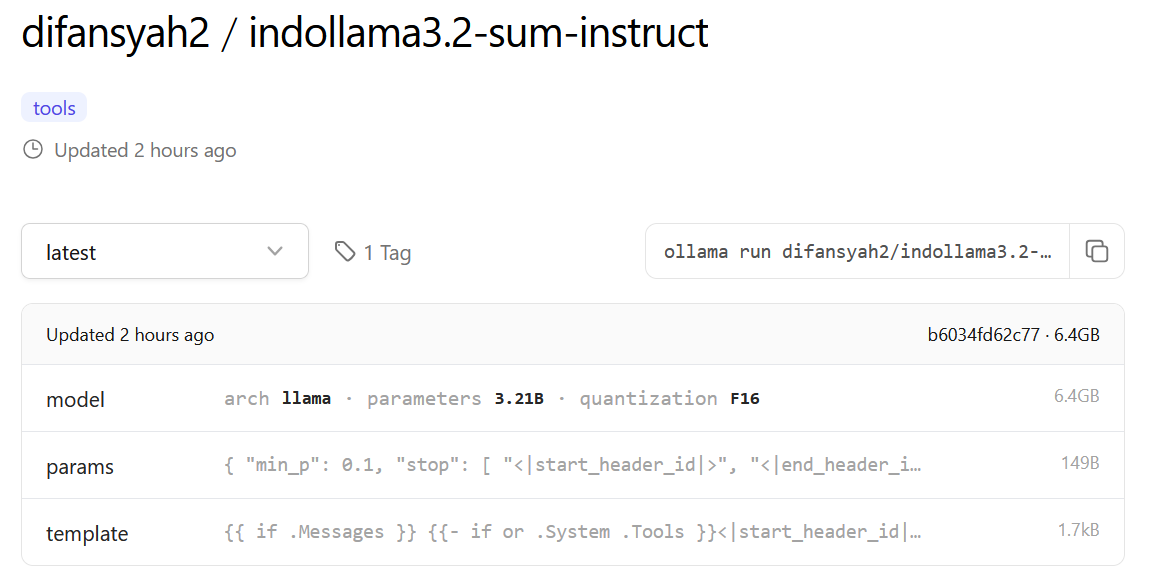

In [ ]:
!cat /root/.ollama/id_ed25519.pub

ssh-ed25519 AAAAC3NzaC1lZDI1NTE5AAAAICxQKNY03xDaPH3/uCK+uqQOqG466xZ1rAmOm+m1H6/l


In [ ]:
!ollama cp indollama3.2-sum-instruct difansyah2/indollama3.2-sum-instruct

copied 'indollama3.2-sum-instruct' to 'difansyah2/indollama3.2-sum-instruct'


In [ ]:
!ollama list

NAME                                           ID              SIZE      MODIFIED       
difansyah2/indollama3.2-sum-instruct:latest    356f1a0541c1    6.4 GB    4 seconds ago     
indollama3.2-sum-instruct:latest               356f1a0541c1    6.4 GB    17 minutes ago    


In [ ]:
!ollama push difansyah2/indollama3.2-sum-instruct

retrieving manifest ⠋ retrieving manifest ⠙ retrieving manifest ⠹ retrieving manifest ⠸ retrieving manifest ⠼ retrieving manifest ⠴ retrieving manifest ⠦ retrieving manifest ⠧ retrieving manifest ⠇ retrieving manifest ⠏ retrieving manifest ⠋ retrieving manifest ⠙ retrieving manifest ⠹ retrieving manifest ⠸ retrieving manifest ⠼ retrieving manifest ⠴ retrieving manifest ⠦ retrieving manifest ⠧ retrieving manifest ⠇ retrieving manifest ⠏ retrieving manifest ⠋ retrieving manifest ⠙ retrieving manifest ⠹ retrieving manifest 
pushing 34b946e9a931...   0% ▕▏ 1.8 MB/6.4 GB                  retrieving manifest 
pushing 34b946e9a931...   0% ▕▏ 1.8 MB/6.4 GB                  retrieving manifest 
pushing 34b946e9a931...   0% ▕▏ 1.8 MB/6.4 GB                  retrieving manifest 
pushing 34b946e9a931...   0% ▕▏ 1.8 MB/6.4 GB                  retrieving manifest 
pushing 34b946e9a931...   0% ▕▏ 1.8 MB/6.4 GB                  retrieving manifest 
pushing 34b946e9a931...   0% ▕▏ 2.1 MB/6.4 GB        

### Opsional Evaluasi menggunakan G-eval

In [1]:
!pip install deepeval --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.3/542.3 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.1/118.1 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.6/166.6 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 94.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━

In [1]:
!deepeval set-local-model --model-name=deepseek-r1:32b \
    --base-url="http://localhost:11434/v1/" \
    --api-key="ollama"

🙌 Congratulations! You're now using a local model for all evals that require an LLM.


In [3]:
import logging
logging.getLogger("langchain_core").setLevel(logging.ERROR)

In [4]:
def GEval_summarization(dataset, output_file=None, threshold=0.5):
    from deepeval.test_case import LLMTestCase, LLMTestCaseParams
    from contextlib import redirect_stdout
    from IPython.display import display
    from deepeval.metrics import GEval
    from deepeval import evaluate
    import pandas as pd
    import os

    results_data = []

    summarization_metric = GEval(
        name="Summarization Quality",
        evaluation_steps=[
            "Check whether the summary accurately represents the main points of the paragraph.",
            "Penalize if any important details are missing.",
            "Ensure that no irrelevant or false information is included in the summary.",
        ],
        evaluation_params=[LLMTestCaseParams.INPUT, LLMTestCaseParams.ACTUAL_OUTPUT],
    )

    for _, row in dataset.iterrows():
        test_case = LLMTestCase(
            input=row["paragraphs"],
            expected_output=row["summary"],
            actual_output=row["prediksi_indollama"],
        )

        with open(os.devnull, 'w') as fnull, redirect_stdout(fnull):
            evaluation_results = evaluate([test_case], [summarization_metric])

        for result in evaluation_results.test_results:
            for metric_data in result.metrics_data:
                score = metric_data.score
                status = "Lulus" if score >= threshold else "Tidak Lulus"
                results_data.append({
                    "paragraphs": result.input,
                    "summary": result.expected_output,
                    "prediksi_indollama": result.actual_output,
                    "score": score,
                    "threshold": threshold,
                    "status": status,
                })

    results = pd.DataFrame(results_data)

    total_tests = len(results)
    passed_tests = len(results[results["status"] == "Lulus"])
    pass_rate = (passed_tests / total_tests) * 100

    print(f"Summarization Quality (GEval): {pass_rate:.2f}% pass rate")
    display(results)

    if output_file:
        results.to_csv(output_file, index=False)
        print(f"Hasil evaluasi disimpan di: {output_file}")

In [5]:
GEval_summarization(finish_df)

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:14, 14.52s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:19, 19.49s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:17, 17.16s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:15, 15.71s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:21, 21.56s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:18, 18.35s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:29, 29.54s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:14, 14.61s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:15, 15.07s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:15, 15.25s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:14, 14.78s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:17, 17.05s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:18, 18.82s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:17, 17.65s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:21, 21.36s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:17, 17.38s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:17, 17.95s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:20, 20.92s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:17, 17.61s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:18, 18.87s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:20, 20.06s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:21, 21.16s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:14, 14.68s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:14, 14.66s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:18, 18.10s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:18, 18.61s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:20, 20.02s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:17, 17.12s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:17, 17.93s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:14, 14.41s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:18, 18.60s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:20, 20.81s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:23, 23.78s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:18, 18.62s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:25, 25.49s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:18, 18.50s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:15, 15.11s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:25, 25.73s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:17, 17.26s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:20, 20.59s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:27, 27.88s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:18, 18.46s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:19, 19.49s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:16, 16.18s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:14, 14.25s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:16, 16.59s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:15, 15.82s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:19, 19.94s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:16, 16.41s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:15, 15.21s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:19, 19.18s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:18, 18.01s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:15, 15.37s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:16, 16.88s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:18, 18.40s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:19, 19.48s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:21, 21.40s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:22, 22.97s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:20, 20.09s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:20, 20.91s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:23, 23.19s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:15, 15.74s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:20, 20.05s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:17, 17.52s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:18, 18.17s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:27, 27.40s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:12, 12.93s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:19, 19.40s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:11, 11.87s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:17, 17.22s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:18, 18.57s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:17, 17.66s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:24, 24.35s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:22, 22.12s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:18, 18.51s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:18, 18.03s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:20, 20.60s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:20, 20.55s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:23, 23.29s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:20, 20.20s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:20, 20.58s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:14, 14.93s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:18, 18.32s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:15, 15.64s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:20, 20.97s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:19, 19.13s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:19, 19.68s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:15, 15.58s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:17, 17.32s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:17, 17.01s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:19, 19.73s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:19, 19.11s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:17, 17.10s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:17, 17.15s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:20, 20.14s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:20, 20.73s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:20, 20.49s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:22, 22.95s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:18, 18.49s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:15, 15.21s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:15, 15.35s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:14, 14.48s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:20, 20.56s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:14, 14.70s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:17, 17.97s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:18, 18.47s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:21, 21.65s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:14, 14.89s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:21, 21.49s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:22, 22.67s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:21, 21.79s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:17, 17.17s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:21, 21.54s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:21, 21.39s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:28, 28.15s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:17, 17.55s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:15, 15.98s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:20, 20.12s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:19, 19.45s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:15, 15.83s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:14, 14.60s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:17, 17.35s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:18, 18.79s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:17, 17.39s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:15, 15.94s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:18, 18.63s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:17, 17.75s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:18, 18.80s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:17, 17.38s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:14, 14.83s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:16, 16.53s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:20, 20.65s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:37, 37.26s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:14, 14.65s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:21, 21.88s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:14, 14.28s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:21, 21.96s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:20, 20.03s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:19, 19.82s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:19, 19.24s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:19, 19.14s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:19, 19.04s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:17, 17.16s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:17, 17.57s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:21, 21.11s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:20, 20.36s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:17, 17.97s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:18, 18.75s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:20, 20.57s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:20, 20.75s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:19, 19.64s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:21, 21.08s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:20, 20.50s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:16, 16.67s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:21, 21.51s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:20, 20.13s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:15, 15.56s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:16, 16.40s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:15, 15.06s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:14, 14.61s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:24, 24.11s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:20, 20.89s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:17, 17.33s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:17, 17.40s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:22, 22.58s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:18, 18.95s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:25, 25.58s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:16, 16.54s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:22, 22.07s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:19, 19.64s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:15, 15.49s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:18, 18.82s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:16, 16.00s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:22, 22.96s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:23, 23.42s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:18, 18.56s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:20, 20.81s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:19, 19.06s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:16, 16.14s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:14, 14.93s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:18, 18.11s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:17, 17.40s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:16, 16.66s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:24, 24.68s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:18, 18.77s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:16, 16.43s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:22, 22.26s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:16, 16.56s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:18, 18.16s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:18, 18.98s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:22, 22.12s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:18, 18.16s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:26, 26.64s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:18, 18.22s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:15, 15.08s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:18, 18.21s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:19, 19.41s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:16, 16.84s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:18, 18.29s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

✨ You're running DeepEval's latest Summarization Quality (GEval) Metric! (using local model, strict=False, 
async_mode=True)...

Evaluating 1 test case(s) in parallel: |██████████|100% (1/1) [Time Taken: 00:16, 16.71s/test case]


✓ Tests finished 🎉! Run 'deepeval login' to save and analyze evaluation results on Confident AI.  
‼️ Looking for a place for your LLM test data to live 🏡? Use Confident AI for test reports, benchmark analysis, 
compare models/prompts, and catch regressions for your LLM system.

Summarization Quality (GEval): 95.50% pass rate


,paragraphs,summary,prediksi_indollama,score,threshold,status
0,Merdeka.com - Bintang haus gol Lionel Messi di...,Bintang haus gol Lionel Messi diyakini tak aka...,Bintang haus gol Lionel Messi diyakini tak aka...,0.7,0.5,Lulus
1,"Jakarta , CNN Indonesia - - Legenda balap moto...","Legenda balap motor Grand Prix , Angel Nieto ,...","Legenda balap motor Grand Prix , Angel Nieto ,...",0.7,0.5,Lulus
2,Denpasar ( ANTARA News ) - Badan Penanggulanga...,Badan Penanggulangan Bencana Daerah Provinsi (...,Badan Penanggulangan Bencana Daerah Provinsi (...,0.8,0.5,Lulus
3,"Jakarta , CNN Indonesia - - Presiden Jokowi me...",Presiden Jokowi menyanggupi kebutuhan biaya un...,Presiden Jokowi menyanggupi kebutuhan biaya un...,0.8,0.5,Lulus
4,"Jakarta , CNN Indonesia - - Kiper Timnas Indon...",Kiper Timnas Indonesia Kurnia Meiga Hermansyah...,Kiper Timnas Indonesia Kurnia Meiga Hermansyah...,0.5,0.5,Lulus
...,...,...,...,...,...,...
195,Seperti apa rasanya jika band favoritmu tampil...,"Golden Bomber , band rock visual kei asal Jepa...","Golden Bomber ( Gōruden Bonbā , dalam lafal ba...",0.6,0.5,Lulus
196,Merdeka.com - Presiden Joko Widodo mendatangi ...,Presiden Joko Widodo mendatangi festival musik...,Presiden Joko Widodo mendatangi festival musik...,0.7,0.5,Lulus
197,"Dilaporkan The Sun , AC Milan tengah menyi...",AC Milan tengah menyiapkan rencana dan dana ' ...,AC Milan tengah menyiapkan rencana dan dana ' ...,0.8,0.5,Lulus
198,Dua gol di babak pertama dari Shkodran Mustafi...,Dua gol di babak pertama dari Shkodran Mustafi...,Dua gol di babak pertama dari Shkodran Mustafi...,0.6,0.5,Lulus
